In [5]:
import cv2
import numpy as np
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.models import Sequential
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.preprocessing import scale
import matplotlib.pyplot as  plt
from matplotlib.image import imread 


In [6]:
train_generator  = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    validation_split = 0.2
)

In [9]:
train = train_generator.flow_from_directory(
    "/content/drive/MyDrive/15p_gg/data_hoa",
    target_size=(150,150),
    subset = "training"
)
valid = train_generator.flow_from_directory(
    "/content/drive/MyDrive/15p_gg/data_hoa",
    target_size=(150,150),
    subset = "validation"
)

Found 44 images belonging to 4 classes.
Found 9 images belonging to 4 classes.


In [10]:
train.class_indices

{'hoa_cuc': 0, 'hoa_mattroi': 1, 'hoa_thuocduoc': 2, 'hoa_vantho': 3}

In [13]:
model = tf.keras.Sequential()
model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(256,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(4,activation='sigmoid'))
opt = SGD(lr = 0.01,momentum=0.9)
model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics=['accuracy'])

history = model.fit(train, validation_data = valid, batch_size=64,epochs=10,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
2/2 [==============================] - 6s 2s/step - loss: 0.6299 - accuracy: 0.3409 - val_loss: 0.4786 - val_accuracy: 0.8889
Epoch 2/10
2/2 [==============================] - 1s 525ms/step - loss: 0.4612 - accuracy: 0.6364 - val_loss: 0.4077 - val_accuracy: 0.5556
Epoch 3/10
2/2 [==============================] - 1s 771ms/step - loss: 0.3883 - accuracy: 0.5909 - val_loss: 0.6643 - val_accuracy: 0.5556
Epoch 4/10
2/2 [==============================] - 1s 844ms/step - loss: 0.7986 - accuracy: 0.3182 - val_loss: 0.6435 - val_accuracy: 0.6667
Epoch 5/10
2/2 [==============================] - 1s 430ms/step - loss: 0.6854 - accuracy: 0.5682 - val_loss: 0.6920 - val_accuracy: 0.5556
Epoch 6/10
2/2 [==============================] - 1s 799ms/step - loss: 0.4782 - accuracy: 0.7045 - val_loss: 0.2388 - val_accuracy: 0.7778
Epoch 7/10
2/2 [==============================] - 2s 619ms/step - loss: 0.3069 - accuracy: 0.7955 - val_loss: 0.1633 - val_accuracy: 1.0000
Epoch 8/10
2/2 [=======

In [14]:
model.save('/content/drive/MyDrive/15p_gg/model_hoa_ANN.h5')

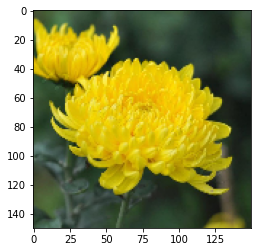

In [18]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img


img = load_img('/content/drive/MyDrive/15p_gg/data_hoa/hoa_cuc/144.jpg', target_size=(150,150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255.0

In [19]:
a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
if a==0:
  print("cuc")
elif a==1:
  print("mattroi")
elif a == 2:
  print("thuocduoc")
elif a==3:
  print("vantho")

[[9.7162610e-01 2.2720754e-02 6.5625636e-07 6.8765879e-04]]
cuc
